In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys, os
root = os.path.join(os.getcwd(), '../')
sys.path.append(root)

from matplotlib import pyplot as plt


# LCLS Injector
---

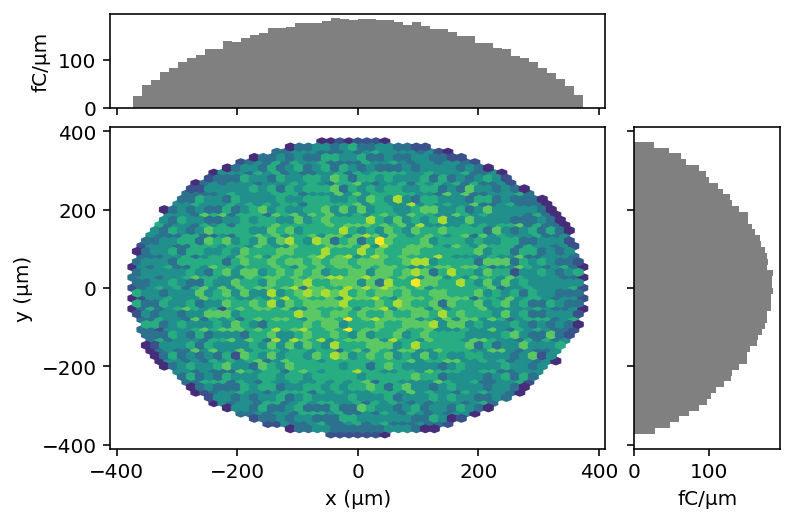

In [2]:
from distgen import Generator

DISTGEN_INPUT_FILE = os.path.join(root, 'templates/srf_injector/distgen.yaml')

gen = Generator(DISTGEN_INPUT_FILE, verbose=0)
gen.run()

gen.particles.plot('x', 'y')

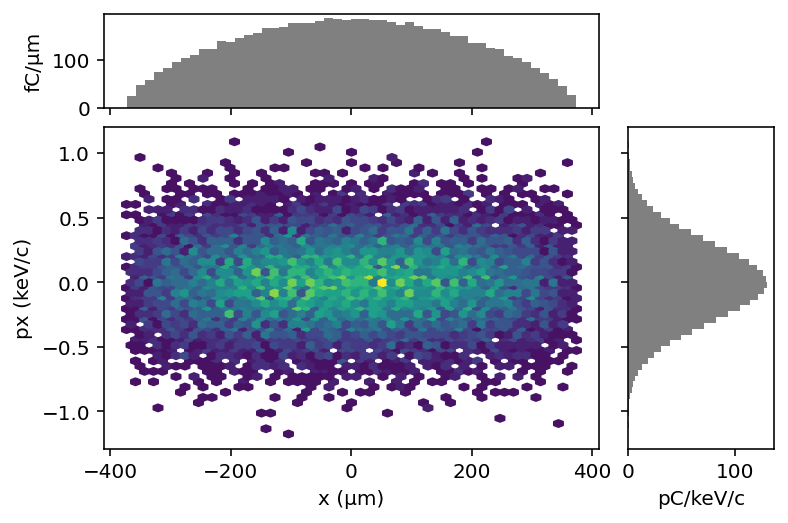

In [3]:
gen.particles.plot('x', 'px')

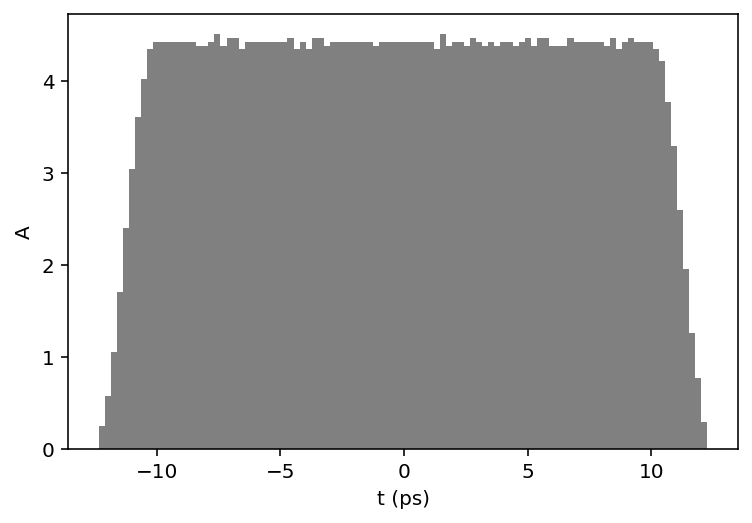

In [4]:
gen.particles.plot('t')

In [3]:
SETTINGS={
    'n_particle':10000,
    'swifel_scale': 30000000.0,
    'swifel_relative_phase': 0,
    'c91_scale': 13745260.538205162,
    'c91_relative_phase': -56.64512789009524,
    'c92_scale': 11946233.551708557,
    'c92_relative_phase': -6.516777279789954,
    'c93_scale': 25384865.363246165,
    'c93_relative_phase': 31.090015374312785,
    'c94_scale': 12152605.998968443,
    'c94_relative_phase': 1.3181929346671777,
    'c95_scale': 8918661.237543773,
    'c95_relative_phase': 4.403450504818665,
    'c96_scale': 32000000.0,
    'c96_relative_phase': 0,
    'c97_scale': 32000000.0,
    'c97_relative_phase': 0,
    'c98_scale': 32000000.0,
    'c98_relative_phase': 0,
    'c99_scale': 32000000.0,
    'c99_relative_phase': 0,
    'sol1_scale': 0.2045, #0.2019127932695301,
    'sol12_scale': 0.15864417339413103,
    'space_charge':1,
    'cathode':1
}

In [4]:
SETTINGS['Ntout']=500
SETTINGS['tmax']=100e-9
SETTINGS['ZSTOP']=20

from gpt.gpt_distgen import run_gpt_with_distgen

GPT_INPUT_FILE = os.path.join(root, 'templates/srf_injector/gpt.in')

G = run_gpt_with_distgen(SETTINGS,
                         gpt_input_file=GPT_INPUT_FILE,
                         distgen_input_file=DISTGEN_INPUT_FILE,
                         verbose=True,
                         auto_phase=True,
                         workdir='temp',
                         use_tempdir=False,
                         timeout=6000
                        )

#G.archive()

Run GPT with Distgen:
Replacing param n_particle with value 10000
swifel_scale is in gpt
swifel_relative_phase is in gpt
c91_scale is in gpt
c91_relative_phase is in gpt
c92_scale is in gpt
c92_relative_phase is in gpt
c93_scale is in gpt
c93_relative_phase is in gpt
c94_scale is in gpt
c94_relative_phase is in gpt
c95_scale is in gpt
c95_relative_phase is in gpt
c96_scale is in gpt
c96_relative_phase is in gpt
c97_scale is in gpt
c97_relative_phase is in gpt
c98_scale is in gpt
c98_relative_phase is in gpt
c99_scale is in gpt
c99_relative_phase is in gpt
sol1_scale is in gpt
sol12_scale is in gpt
space_charge is in gpt
cathode is in gpt
Ntout is in gpt
tmax is in gpt
ZSTOP is in gpt
Linking particle files, distgen output will point to -> "gpt_particles.gdf" in working directory.

Distgen >------

Distribution format: gpt
Output file: /Users/colwyngulliford/Documents/GitHub/lume-gpt/examples/temp/gpt_particles.gdf

Creating beam distribution....
   Beam starting from: cathode
   Total 

ValueError: GPT PHASING ERROR: No screen output found. GPT crashed? See last print out above.

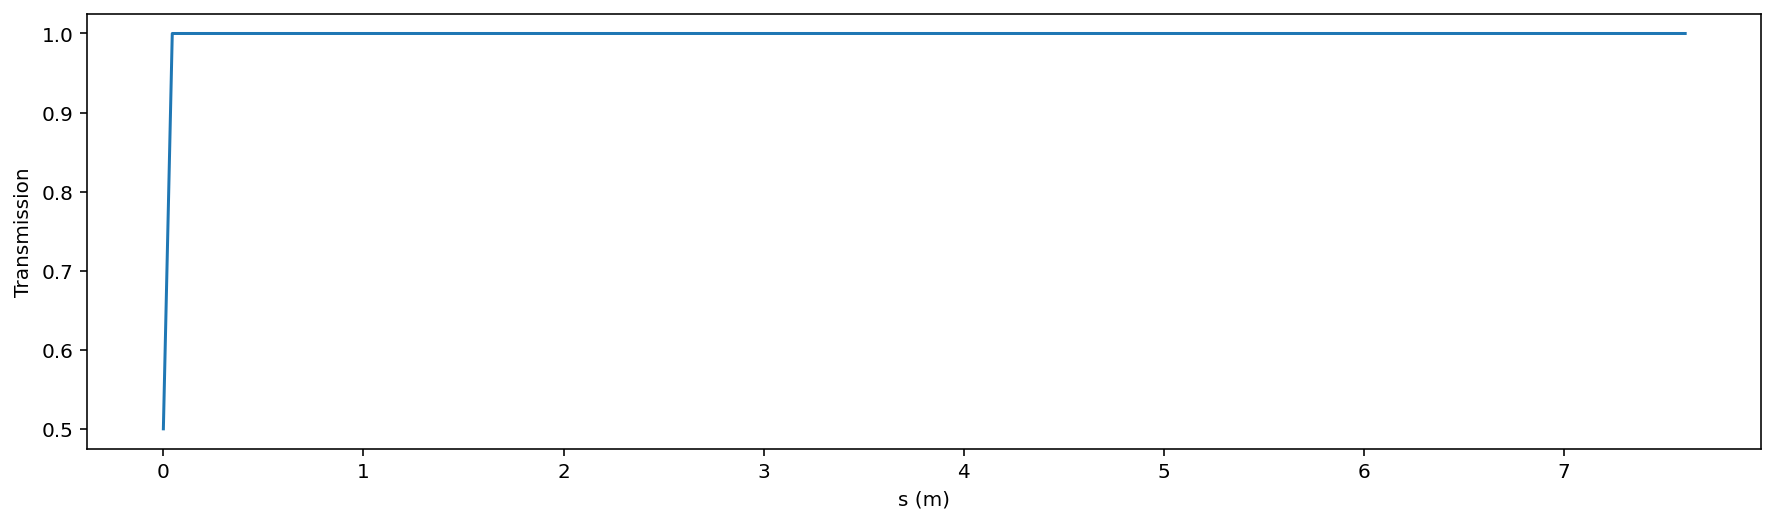

In [12]:
N = [len(tout['x'])/SETTINGS['n_particle'] for tout in G.tout]

plt.figure(figsize=(15,4))
plt.plot(G.tout_stat('mean_z'), N); 
plt.xlabel('s (m)');
plt.ylabel('Transmission');

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(G.tout_stat('mean_z'), G.tout_stat('mean_kinetic_energy')/1e6); 
plt.xlabel('s (m)');
plt.ylabel('KE (MeV)');

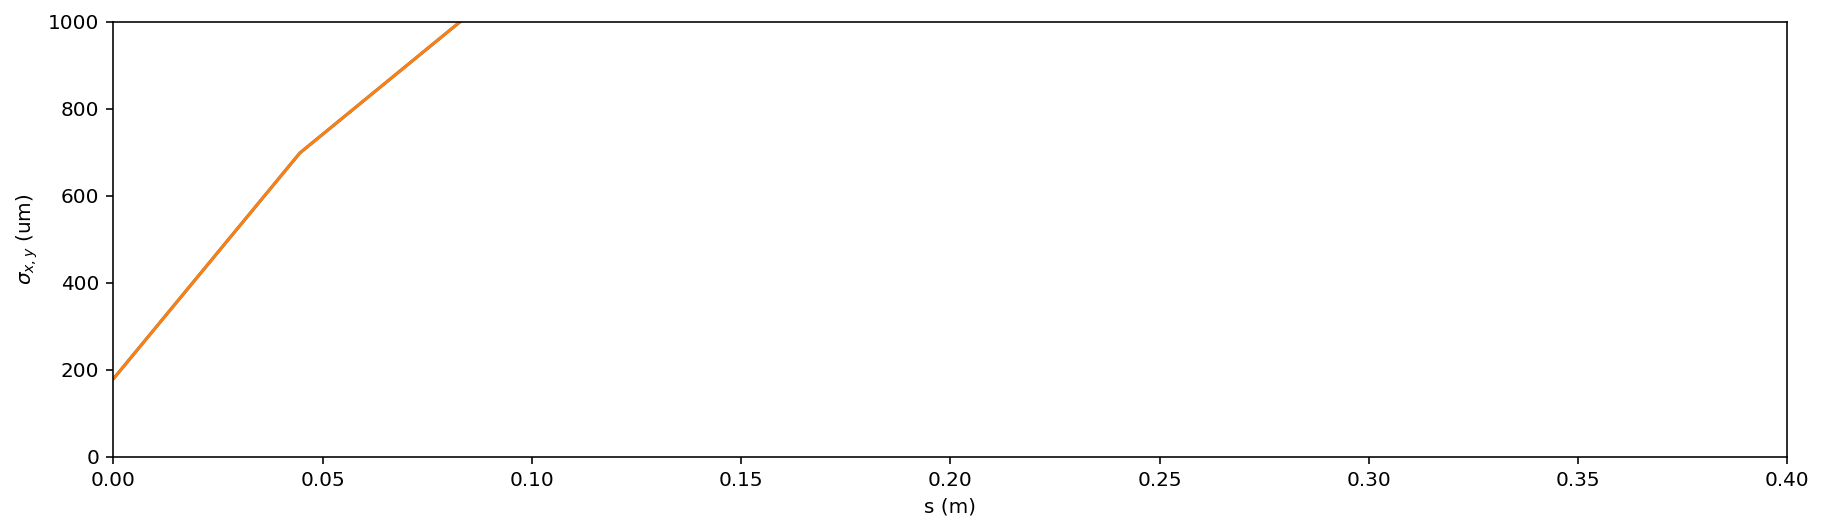

In [20]:
plt.figure(figsize=(15,4))
plt.plot(G.s_ccs, G.tout_ccs_stat('sigma_x')*1e6, 'tab:blue');
plt.plot(G.s_ccs, G.tout_ccs_stat('sigma_y')*1e6, 'tab:orange');
plt.xlabel('s (m)')
plt.ylabel('$\sigma_{x,y}$ (um)');
plt.xlim([0, 0.4]);
plt.ylim([0, 1000]);

In [20]:
from astra import Astra
#A = Astra.from_archive('astra_sc_inj2_v1_SC_off.h5')
A = Astra.from_archive('astra_sc_inj2_v1_SC_on_SOL1fine_tweaked.h5')

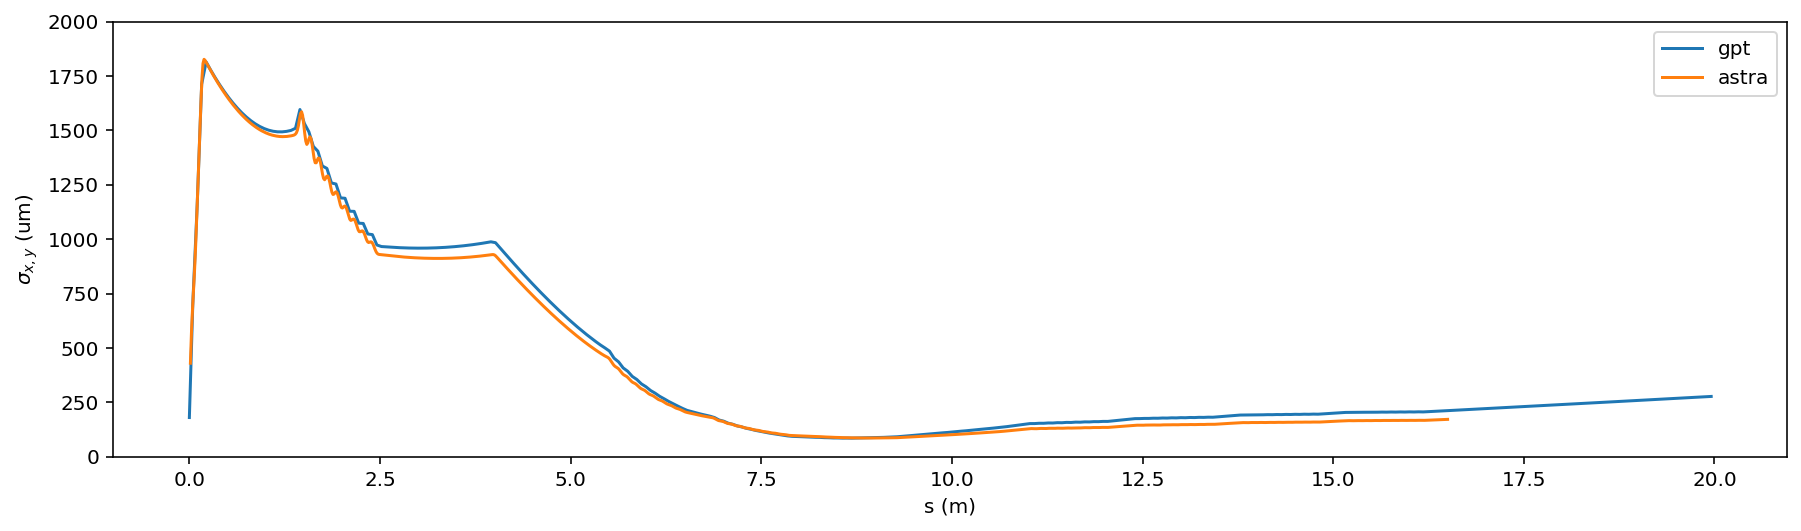

In [22]:
A.stat('mean_kinetic_energy')

plt.figure(figsize=(15,4))
plt.plot(G.s_ccs, G.tout_ccs_stat('sigma_x')*1e6, 'tab:blue');
#plt.plot(G.s_ccs, G.tout_ccs_stat('sigma_y')*1e6, 'tab:orange');
#plt.plot(G.screen_stat('mean_z')[-1], G.screen_stat('sigma_x')[-1]*1e6, color='tab:blue', marker='o');
#plt.plot(G.screen_stat('mean_z')[-1], G.screen_stat('sigma_y')[-1]*1e6, color='tab:orange', marker='o');
plt.plot(A.stat('mean_z'), A.stat('sigma_x')*1e6, 'tab:orange');
#plt.plot(A.stat('mean_z'), A.stat('sigma_y')*1e6, 'tab:orange');
plt.xlabel('s (m)')
plt.ylabel('$\sigma_{x,y}$ (um)');
#plt.xlim([0, 0.4]);
plt.ylim([0, 2000]);
plt.legend(['gpt', 'astra'])


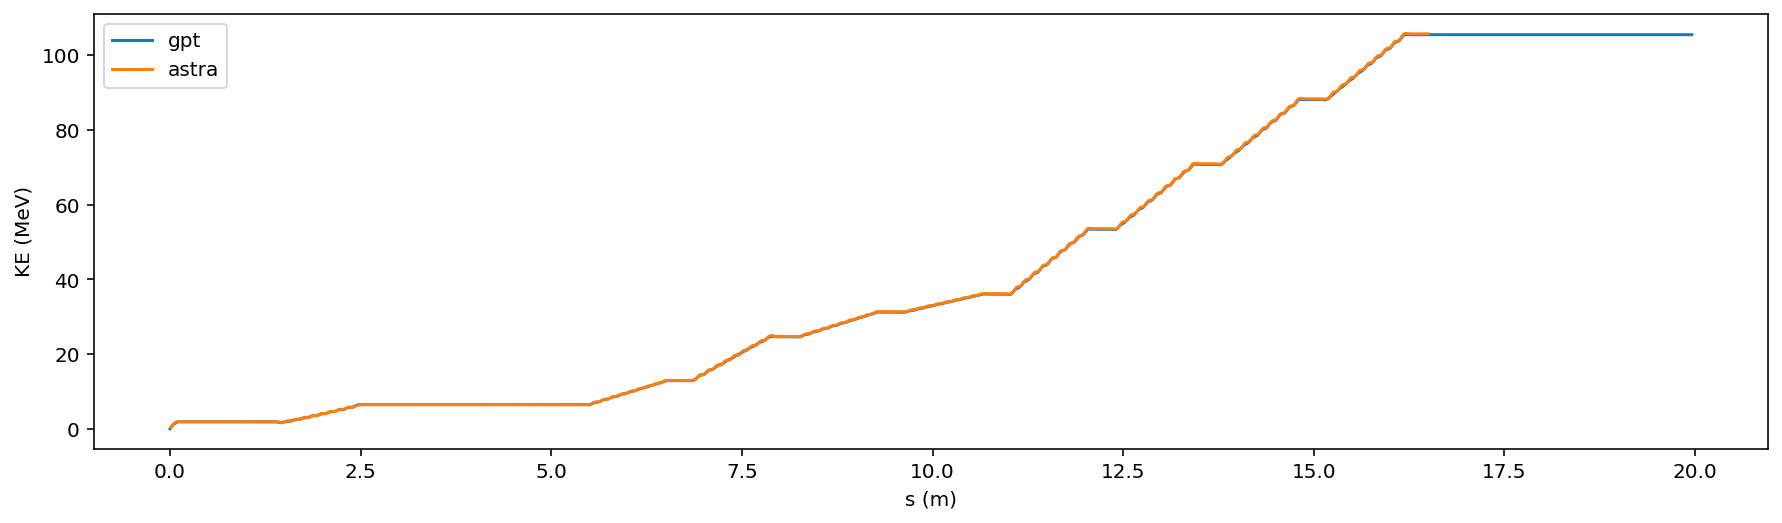

In [23]:
plt.figure(figsize=(15,4))
plt.plot(G.tout_stat('mean_z'), G.tout_stat('mean_kinetic_energy')/1e6); 
plt.plot(A.stat('mean_z'), A.stat('mean_kinetic_energy')/1e6); 
plt.xlabel('s (m)');
plt.ylabel('KE (MeV)');
plt.legend(['gpt', 'astra'])

In [19]:
G.archive()

Archiving to file gpt_4f54d89c0a37bfcc1c0721cd530a50bf.h5


'gpt_4f54d89c0a37bfcc1c0721cd530a50bf.h5'

(0.0, 800.0)

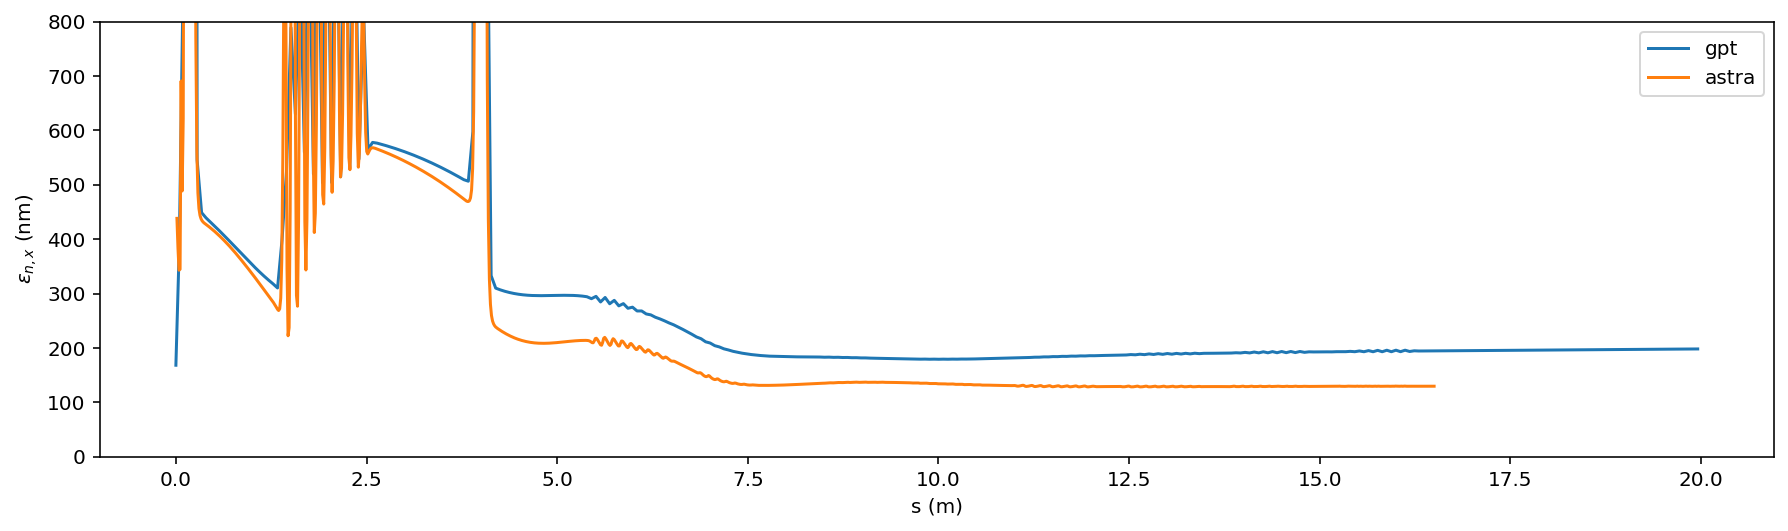

In [29]:
plt.figure(figsize=(15,4))
plt.plot(G.tout_stat('mean_z'), G.tout_stat('norm_emit_x')*1e9); 
plt.plot(A.stat('mean_z'), A.stat('norm_emit_x')*1e9); 
plt.xlabel('s (m)');
plt.ylabel('$\epsilon_{n,x}$ (nm)');
plt.legend(['gpt', 'astra'])
plt.ylim([0, 800])